In [69]:
library(car) # for Anova
library(ggplot2) # for plotting

# Part 1: Two-Factor ANOVA

Scenario: A study is made of amino acids in the hemolymph of millipedes. Use the data set in the folder indicating the species (spp), sex (sex) and alanine (ala) concnetrations (mg/100ml). Put the .csv file in the folder you are using as your WD and project home.

Then:  
1. Test the research hypothesis that species affects alanine concentrations.  
2. Test the research hypothesis that sex affects alanine concentrations.  
3. Test the research hypothesis that the effect of sex depends on species. *NOTE: all these tests should be accomplished in one analysis: the two-factor ANOVA.*  
4. Prepare a graph to show your results. *Note: that when you don’t have a significant interaction you may choose to create 2 figures based on your results from the main effects. Means comparisons for main effects should follow rules for a 1-way ANOVA.*  

In [70]:
milli <- read.csv('millipeds.csv') # import millipede data
milli$spp <- as.factor(milli$spp) # change spp to factor type
str(milli) # look at dataframe structure (verify)

'data.frame':	24 obs. of  3 variables:
 $ sex: Factor w/ 2 levels "female","male": 1 1 1 1 1 1 1 1 1 1 ...
 $ spp: Factor w/ 3 levels "1","2","3": 1 1 1 1 2 2 2 2 3 3 ...
 $ ala: num  14.8 15.6 13.5 16.4 12.1 11.4 12.7 14.5 14.4 14.7 ...


Make a model to test the whether there is an interaction between species and sex on alanine concentrations in millipedes.

**What is the null?**

> There is no interaction between sex and species on alanine concentration:  
> $\mu_{M,S1} = \mu_{M,S2} = \mu_{M,S3} = \mu_{F,S1} = \mu_{F,S2} = \mu_{F,S3}$

In [71]:
millimodel <- aov(ala~sex+spp+sex:spp, data=milli) # fit model
Anova(millimodel, type='II') # anova table

,Sum Sq,Df,F value,Pr(>F)
sex,138.720417,1,65.679424,2.036926e-07
spp,55.260833,2,13.082067,3.103309e-04
sex:spp,6.890833,2,1.631288,2.233107e-01
Residuals,38.017500,18,NA,NA


**Is the interaction significant?**

> No.  (p-value: 0.223 > 0.05)

**Does the alanine in different sexes of millipedes depend on species?**

> No, the interaction between sex and species is not significant.

**What should you do next?**

> Fit a new model without the interaction, then run post hoc test.

**What is happening in this code below?**

> Fits analysis of variance model to data (without interaction).  Generates type II ANOVA table.

In [72]:
millimodel2 <- aov(ala~sex+spp, data=milli) # fit model
Anova(millimodel2, type='II') # anova table

,Sum Sq,Df,F value,Pr(>F)
sex,138.72042,1,61.77937,1.529574e-07
spp,55.26083,2,12.30525,3.280415e-04
Residuals,44.90833,20,NA,NA


**Are there significant effects of sex and species on alanine?**

> Both sex and species have significant effects on alanine (p-values << 0.05).

Now you need to determine who is different from whom.

In [73]:
TukeyHSD(millimodel2) # run tukey post hoc

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ala ~ sex + spp, data = milli)

$sex
                diff      lwr      upr p adj
male-female 4.808333 3.532249 6.084418 2e-07

$spp
       diff        lwr        upr     p adj
2-1 -3.7125 -5.6080527 -1.8169473 0.0002160
3-1 -2.0125 -3.9080527 -0.1169473 0.0362524
3-2  1.7000 -0.1955527  3.5955527 0.0838160


### What is the outcome of this analysis? Remember to make a nice graph of each of the main effects and remember to include a figure caption.

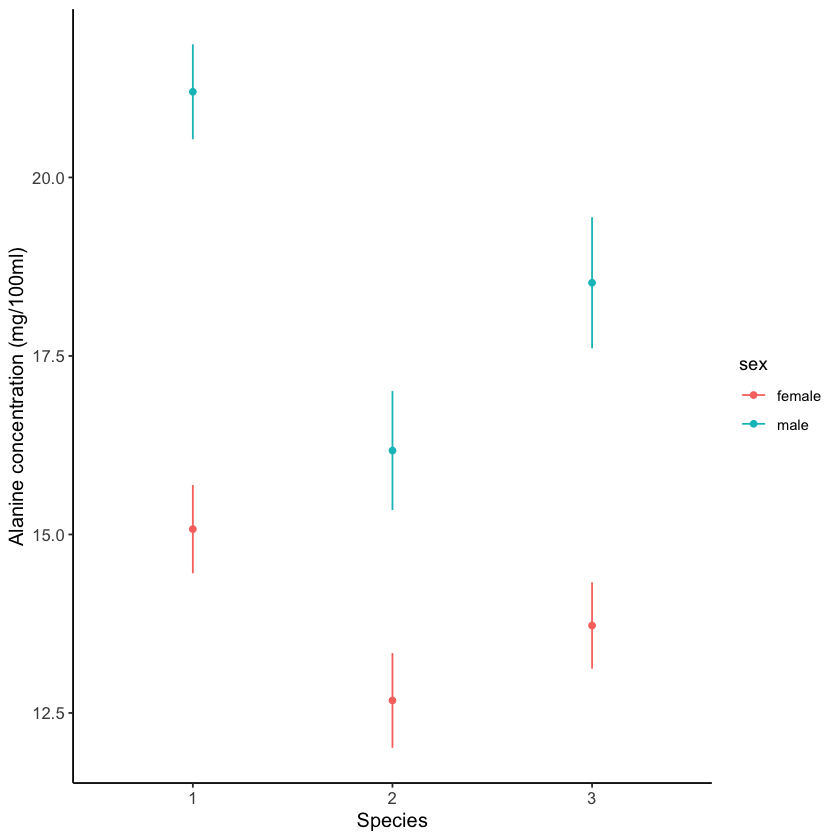

In [74]:
graph <- ggplot(milli, aes(x = spp, y = ala, colour = sex)) +
  geom_point(stat = 'summary', fun.y = 'mean') +
  geom_errorbar(stat = 'summary', fun.data = 'mean_se', 
                width=0, fun.args = list(mult = 1)) +
  labs(x = 'Species', y = 'Alanine concentration (mg/100ml)') +
  theme_classic() +
  theme(
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)
  )
graph

> Figure Caption: The relationship between species, sex, and alanine concentrations in millipedes.  There is no significant interaction between sex and species (F$_{2,18}$ = 1.63, p = 0.223) but alanine concentration depends on both (sex: F$_{1,20}$ = 61.78, p = 1.53e-07; spp: F$_{2,20}$ = 12.31, p = 3.28e-04). Alanine concentration is higher for males in general and in species 1.  There is not a significant difference between species 2 and 3.

# Part 2: Practice with Blocks and Covariates

Recall: Blocks and covariates are another way to reduce SSerror by accounting for variation created by categorical IV (blocks) or meristic IV (covariates). In general, factors that are blocks or covariates are not of central interest in your study. Block and covariates ARE NOT included in interaction terms.  

These are data from an experiment on hairy mole rats, which are solitary fossorial creatures. Six mole rats were given testosterone implants, six were given control implants. The field metabolic rate of each of the 12 mole rats was measured over a 3 day period. You made two different experimental runs. Because they live in a number of habitat types, the soil temperatures experienced varies from rat to rat. You, of course, took pains to take soil temperatures. Use the data file in the folder for today.  

Determine if there was an effect of hormone treatment on field metabolic rate (MR). Also see if you should include average temperature and/or experimental run as blocks or covariates in your model.  

Import and check your data:

In [75]:
mole <- read.csv('moledata.csv')
mole$ext <- as.factor(mole$ext)
str(mole)

'data.frame':	12 obs. of  4 variables:
 $ tx  : Factor w/ 2 levels "control","testost": 2 2 2 2 2 2 1 1 1 1 ...
 $ mr  : num  11.1 11.7 12.5 12.9 13.1 11.2 12.2 10.7 11.4 11 ...
 $ temp: num  19.1 22.7 23.8 22.6 24.8 25.1 21.2 21.5 23.9 25.5 ...
 $ ext : Factor w/ 2 levels "1","2": 1 2 1 2 1 2 1 2 1 2 ...


**What type of data do you have for each variable?**

> tx, ext are categorical (factor)  
> mr, temp are meristic continuous (num)

Make your initial model testing your research hypothesis that testosterone affects the metabolic rate of mole rats.

**What type of analysis/design is this?**

> One-factor ANOVA.

**What is your statistical null and alternative?**

> H$_0$: $\mu_{control} = \mu_{testosterone}$  
> H$_A$: $\mu_{control} \neq \mu_{testosterone}$

In [76]:
molemod <- aov(mr~tx, data=mole)
aovtable <- Anova(molemod, type='II')
aovtable

,Sum Sq,Df,F value,Pr(>F)
tx,3.100833,1,4.640808,0.0566564
Residuals,6.681667,10,NA,NA


**From this output, calculate the MSE for the mr~tx model:**

In [77]:
SSresid <- aovtable$Sum[2]
dfresid <- aovtable$Df[2]
MSE <- SSresid/dfresid
MSE

[1] 0.6681667

Next - run model again, this time adding in effect of the experimental run (your block):

In [78]:
molemod2 <- aov(mr~tx+ext, data=mole)
Anova(molemod2, type='II')

,Sum Sq,Df,F value,Pr(>F)
tx,3.100833,1,5.284677,0.04708848
ext,1.400833,1,2.387407,0.15671592
Residuals,5.280833,9,NA,NA


In [79]:
summary(molemod2)

            Df Sum Sq Mean Sq F value Pr(>F)  
tx           1  3.101  3.1008   5.285 0.0471 *
ext          1  1.401  1.4008   2.387 0.1567  
Residuals    9  5.281  0.5868                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**What term did you add to the model?**

> Experimental runs (ext).

**What is your MSE now?**

> 0.5868

**Is it smaller that in your first model?**

> Yes (0.5868 < 0.6682).

**Did adding the block remove some unexplained error?**

> Yes (MSE refers to unexplained error).

**What should you do next?**

> Leave the block in so that we can remove its contribution to variance.

Lastly - let's say instead of a block, you were assessing the effect of the covariate of temp on your DV.

In [80]:
molemod3 <- aov(mr~tx+temp, data=mole)
summary.aov(molemod3)

            Df Sum Sq Mean Sq F value Pr(>F)  
tx           1  3.101  3.1008   4.265 0.0689 .
temp         1  0.138  0.1376   0.189 0.6738  
Residuals    9  6.544  0.7271                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**What is your MSE now?**

> 0.7271

**Did adding the temp improve your ability to detect an effect of treatment on metabolic rate?**

> No (0.7271 > 0.6682).  You should not account for temp in your model.